In [1]:
# values represent time in milliseconds obtained with: time python -V
#
# test system:
# idle workernode of doduo Tier-2 cluster at HPC-UGent (node3511)
# RHEL 8.8, CernVM-FS 2.11.2, kernel 4.18.0-477.27.1.el8_8.x86_64
# 
# tests run after loading Python/3.11.3-GCCcore-12.3.0 module
#
# software stack was installed with EasyBuild 4.8.2
#
# FIXME: tests for CernVM-FS configurations run with Python/3.8.2-GCCcore-9.3.0 (from /cvmfs/pilot.eessi-hpc.org/versions/2021.12)
# should re-test with software stack in /cvmfs/software.eessi.io/versions/2023.06
# 
# tests run on Sun 19 Nov 2023 by Kenneth Hoste

In [2]:
dev_shm_cold_cache = [8, 7, 9, 6, 8]

In [3]:
tmp_cold_cache = [69, 42, 47, 64, 60]

In [4]:
cvmfs_cold_cache_proxy = [241, 241, 242, 239, 244]

In [5]:
cvmfs_cold_cache_no_proxy_rug_s1 = [869, 854, 854, 858, 853]

In [6]:
cvmfs_cold_cache_no_proxy_aws_eu_west = [1362, 1244, 1297, 1355, 1167]

In [7]:
cvmfs_cold_cache_no_proxy_azure_us_east = [4491, 3146, 4931, 4214, 3843]

In [8]:
cvmfs_warm_cache_proxy = [41, 39, 39, 39, 39]

In [9]:
cvmfs_warm_cache_no_proxy_rug_s1 = [40, 39, 39, 38, 38]

In [10]:
cvmfs_warm_cache_no_proxy_aws_eu_west = [41, 38, 37, 40, 38]

In [11]:
cvmfs_warm_cache_no_proxy_azure_us_east = [42, 40,39, 38, 39]

In [12]:
dev_shm_hot_cache = [3, 3, 3, 3, 3]

In [13]:
tmp_hot_cache = [3, 2, 2, 2, 2]

In [14]:
cvmfs_hot_cache = [4, 3, 4, 3, 3]

In [15]:
from pandas import DataFrame
from seaborn import violinplot

Text(0, 0.5, 'time (milliseconds) - log scale')

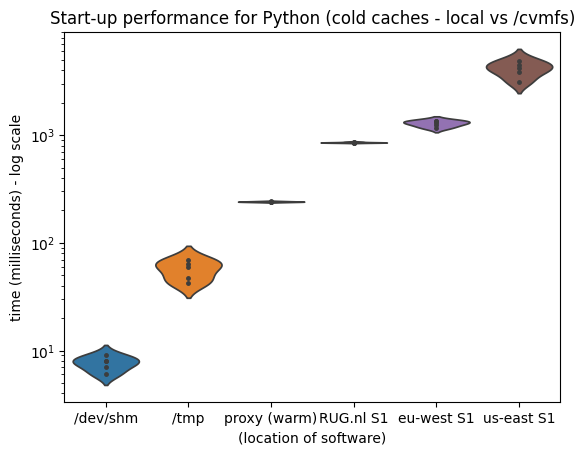

In [16]:
data_cold_cache = {
    "/dev/shm": dev_shm_cold_cache,
    "/tmp": tmp_cold_cache,
    "proxy (warm)": cvmfs_cold_cache_proxy,
    "RUG.nl S1": cvmfs_cold_cache_no_proxy_rug_s1,
    "eu-west S1": cvmfs_cold_cache_no_proxy_aws_eu_west,
    "us-east S1": cvmfs_cold_cache_no_proxy_azure_us_east,
}
plot = violinplot(data_cold_cache, inner="point", log_scale=True)
plot.set_title("Start-up performance for Python (cold caches - local vs /cvmfs)")
plot.set_xlabel("(location of software)")
plot.set_ylabel("time (milliseconds) - log scale")

Text(0, 0.5, 'time (ms)')

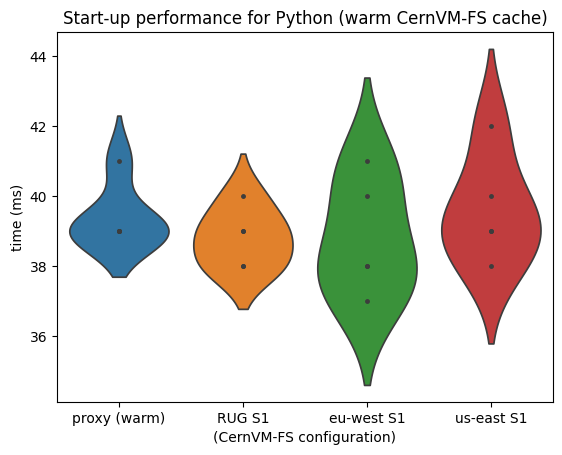

In [17]:
data_warm_cache = {
    "proxy (warm)": cvmfs_warm_cache_proxy,
    "RUG S1": cvmfs_warm_cache_no_proxy_rug_s1,
    "eu-west S1": cvmfs_warm_cache_no_proxy_aws_eu_west,
    "us-east S1":cvmfs_warm_cache_no_proxy_azure_us_east,
}
plot = violinplot(data_warm_cache, inner="point")
plot.set_title("Start-up performance for Python (warm CernVM-FS cache)")
plot.set_xlabel("(CernVM-FS configuration)")
plot.set_ylabel("time (ms)")

Text(0, 0.5, 'time (ms)')

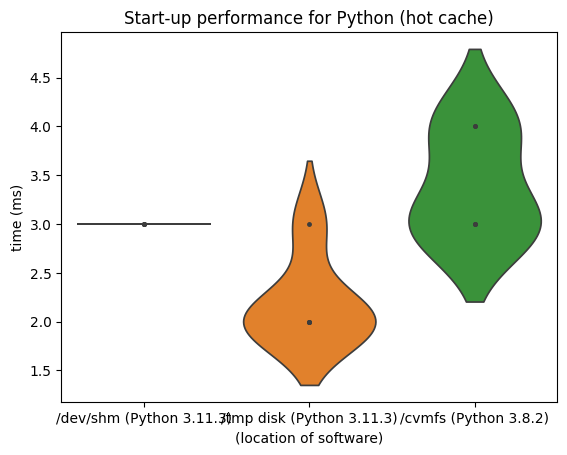

In [18]:
data_hot_cache = {
    "/dev/shm (Python 3.11.3)": dev_shm_hot_cache,
    "/tmp disk (Python 3.11.3)": tmp_hot_cache,
    "/cvmfs (Python 3.8.2)": cvmfs_hot_cache,
}
plot = violinplot(data_hot_cache, inner="point")
plot.set_title("Start-up performance for Python (hot cache)")
plot.set_xlabel("(location of software)")
plot.set_ylabel("time (ms)")

Text(0, 0.5, 'time (ms)')

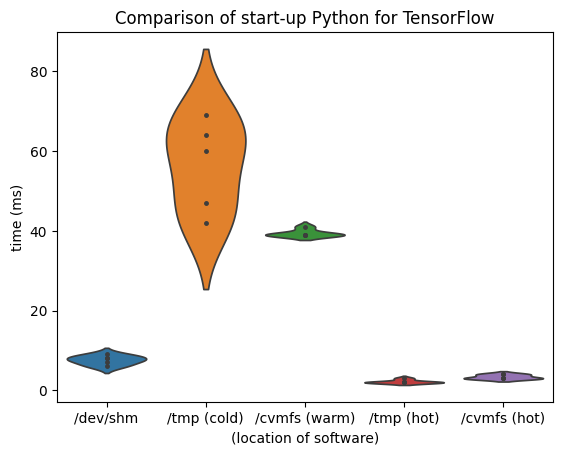

In [19]:
data_compare = {
    "/dev/shm": dev_shm_cold_cache,
    "/tmp (cold)": tmp_cold_cache,
    "/cvmfs (warm)": cvmfs_warm_cache_proxy,
    "/tmp (hot)": tmp_hot_cache,
    "/cvmfs (hot)": cvmfs_hot_cache,
}
plot = violinplot(data_compare, inner="point")
plot.set_title("Comparison of start-up Python for TensorFlow")
plot.set_xlabel("(location of software)")
plot.set_ylabel("time (ms)")